In [1]:
import pandas as pd
import numpy as np
import sys

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from plots import upset_plot


# Merged PG ang Genes from peptides level

In [2]:
# # CLIENT LEVEL
path_to_data = '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/04_Peptides_PG'
#path_to_data = '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/03_Peptides_Genes'

centers = ['Center1', 'Center2', 'Center3']
intensities_PG_from_pep = {}
metadatas = {}

for center in centers:
    data = pd.read_csv(f'{path_to_data}/{center}/intensities_filtered.tsv', sep='\t')
    metadata = pd.read_csv(f'{path_to_data}/{center}/metadata.tsv', sep='\t')

    print(f'Center: {center}')
    print(f'Number of samples: {metadata.shape[0]}')
    print(f'Number of features: {data.shape[0]}')
    ####################### Filter and replacement #######################
    # replace 0 with NaN in intensities_PG_from_pep
    data = data.replace(0, pd.NA)
    # filter rows with less then 2 non NaN values
    data = data.dropna(thresh=2)
    print(f'Number of features after filtering: {data.shape[0]}')

    intensities_PG_from_pep[center] = data
    metadatas[center] = metadata
    print('')

Center: Center1
Number of samples: 22
Number of features: 496
Number of features after filtering: 494

Center: Center2
Number of samples: 21
Number of features: 516
Number of features after filtering: 510

Center: Center3
Number of samples: 22
Number of features: 439
Number of features after filtering: 428



In [3]:
# # CLIENT LEVEL
# path_to_data = '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/04_Peptides_PG'
path_to_data = '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/03_Peptides_Genes'

centers = ['Center1', 'Center2', 'Center3']
intensities_Gene_from_pep = {}

for center in centers:
    data = pd.read_csv(f'{path_to_data}/{center}/intensities_filtered.tsv', sep='\t')
    metadata = pd.read_csv(f'{path_to_data}/{center}/metadata.tsv', sep='\t')

    print(f'Center: {center}')
    print(f'Number of samples: {metadata.shape[0]}')
    print(f'Number of features: {data.shape[0]}')
    ####################### Filter and replacement #######################
    # replace 0 with NaN in intensities_PG_from_pep
    data = data.replace(0, pd.NA)
    # filter rows with less then 2 non NaN values
    data = data.dropna(thresh=2)
    print(f'Number of features after filtering: {data.shape[0]}')

    intensities_Gene_from_pep[center] = data
    metadatas[center] = metadata
    print('')

Center: Center1
Number of samples: 22
Number of features: 488
Number of features after filtering: 486

Center: Center2
Number of samples: 21
Number of features: 507
Number of features after filtering: 501

Center: Center3
Number of samples: 22
Number of features: 431
Number of features after filtering: 420



# MQ PG and Genes from proteinGroups.txt

In [4]:
# # CLIENT LEVEL
# path_to_data = '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/04_Peptides_PG'
path_to_data = '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/01_PG_Genes'

centers = ['Center1', 'Center2', 'Center3']
intensities_Gene_from_MQ = {}

for center in centers:
    data = pd.read_csv(f'{path_to_data}/{center}/genes_intensities.tsv', sep='\t')

    print(f'Center: {center}')
    print(f'Number of samples: {metadata.shape[0]}')
    print(f'Number of features: {data.shape[0]}')
    ####################### Filter and replacement #######################
    # replace 0 with NaN in intensities_PG_from_pep
    data = data.replace(0, pd.NA)
    # filter rows with less then 2 non NaN values
    data = data.dropna(thresh=2)
    print(f'Number of features after filtering: {data.shape[0]}')

    intensities_Gene_from_MQ[center] = data
    print('')

Center: Center1
Number of samples: 22
Number of features: 485
Number of features after filtering: 484

Center: Center2
Number of samples: 22
Number of features: 508
Number of features after filtering: 500

Center: Center3
Number of samples: 22
Number of features: 430
Number of features after filtering: 418



In [5]:
# # CLIENT LEVEL
# path_to_data = '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/04_Peptides_PG'
path_to_data = '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/02_PG_MajorPG'

centers = ['Center1', 'Center2', 'Center3']
intensities_PG_from_MQ = {}

for center in centers:
    data = pd.read_csv(f'{path_to_data}/{center}/pg_intensities.tsv', sep='\t')

    print(f'Center: {center}')
    print(f'Number of samples: {metadata.shape[0]}')
    print(f'Number of features: {data.shape[0]}')
    ####################### Filter and replacement #######################
    # replace 0 with NaN in intensities_PG_from_pep
    data = data.replace(0, pd.NA)
    # filter rows with less then 2 non NaN values
    data = data.dropna(thresh=2)
    print(f'Number of features after filtering: {data.shape[0]}')

    intensities_PG_from_MQ[center] = data
    print('')

Center: Center1
Number of samples: 22
Number of features: 491
Number of features after filtering: 490

Center: Center2
Number of samples: 22
Number of features: 516
Number of features after filtering: 508

Center: Center3
Number of samples: 22
Number of features: 438
Number of features after filtering: 425



# Evaluation of groups intersection (UpSet)

- intensities_PG_from_MQ
- intensities_PG_from_pep

- intensities_Gene_from_MQ
- intensities_Gene_from_pep

## Genes

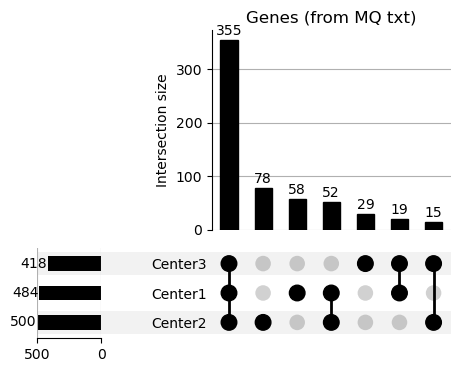

In [8]:
upset_plot.generate_upset_plot(intensities_Gene_from_MQ, 'Gene.names', 'Genes (from MQ txt)', splited=False)

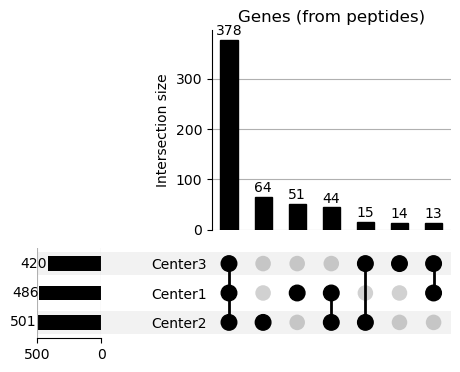

In [9]:
upset_plot.generate_upset_plot(intensities_Gene_from_pep, 'major_features', 'Genes (from peptides)', splited=False)

In [ ]:
round(355 * 100 /418, 1)

84.9

In [ ]:
round(378 * 100 /420, 1)

90.0

## PG

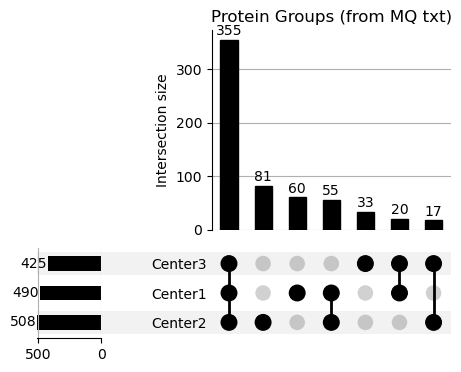

In [10]:
upset_plot.generate_upset_plot(intensities_PG_from_MQ, 'Majority.protein.IDs', 'Protein Groups (from MQ txt)', splited=False)

In [ ]:
# generate_upset_plot(intensities_PG_from_MQ, 'Majority.protein.IDs', 'Proteins (from MQ txt)', splited=True)

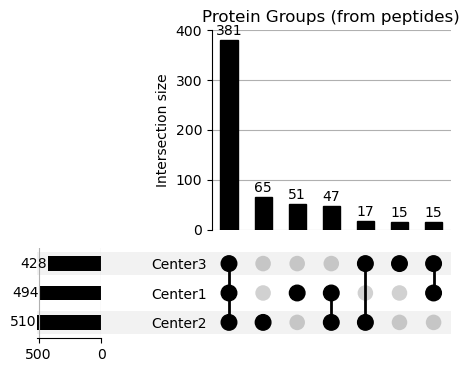

In [11]:
upset_plot.generate_upset_plot(intensities_PG_from_pep, 'major_features', 'Protein Groups (from peptides)', splited=False)

In [ ]:
# generate_upset_plot(intensities_PG_from_pep, 'major_features', 'Proteins (from peptides)', splited=True)

In [ ]:
round(355 * 100 /425, 1)

83.5

In [ ]:
round(381 * 100 /428, 1)

89.0

# Combined run

In [12]:
original_PG = {}

# Load the original data
original_data = pd.read_csv('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_reviewed_MQ_report/Combined_rew/proteinGroups.txt', sep='\t')
# filter if Reverse or Potential contaminant columns contain +, if the value is empty - keep it
original_data = original_data[~original_data['Reverse'].str.contains('\+', na=False)]
original_data = original_data[~original_data['Potential contaminant'].str.contains('\+', na=False)]
original_data = original_data[~original_data['Only identified by site'].str.contains('\+', na=False)]
# replace " " with "." in column names
original_data.columns = original_data.columns.str.replace(' ', '.')

for center in centers:
    print(f'Center: {center}')
    original_data_center = original_data.loc[:,['Majority.protein.IDs', *metadatas[center].index.tolist()]]
    original_PG[center] = original_data_center
    print(f'Number of features: {original_PG[center].shape[0]}')

    # replace 0 with NaN
    original_PG[center] = original_PG[center].replace(0, pd.NA)
    # filter rows with less then 2 non NaN values
    original_PG[center] = original_PG[center].dropna(thresh=2)
    print(f'Number of features after filtering: {original_PG[center].shape[0]}')
    print('')



Center: Center1
Number of features: 631
Number of features after filtering: 560

Center: Center2
Number of features: 631
Number of features after filtering: 582

Center: Center3
Number of features: 631
Number of features after filtering: 502



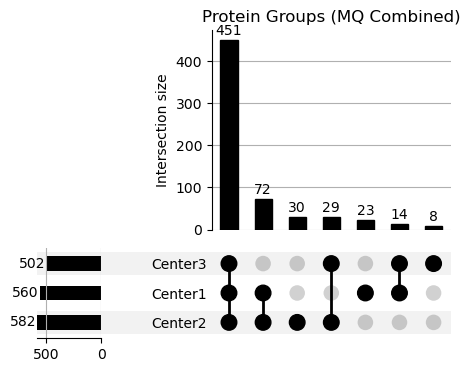

In [13]:
upset_plot.generate_upset_plot(original_PG, 'Majority.protein.IDs', 'Protein Groups (MQ Combined)', splited=False)

In [14]:
round(451 * 100 / 502, 1)

89.8

In [15]:
original_gene = {}

# Load the original data
original_data = pd.read_csv('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_reviewed_MQ_report/Combined_rew/proteinGroups.txt', sep='\t')
# filter if Reverse or Potential contaminant columns contain +, if the value is empty - keep it
original_data = original_data[~original_data['Reverse'].str.contains('\+', na=False)]
original_data = original_data[~original_data['Potential contaminant'].str.contains('\+', na=False)]
original_data = original_data[~original_data['Only identified by site'].str.contains('\+', na=False)]
# replace " " with "." in column names
original_data.columns = original_data.columns.str.replace(' ', '.')

for center in centers:
    print(f'Center: {center}')
    original_data_center = original_data.loc[:,['Gene.names', *metadatas[center].index.tolist()]]
    original_gene[center] = original_data_center
    print(f'Number of features: {original_gene[center].shape[0]}')

    # replace 0 with NaN
    original_gene[center] = original_gene[center].replace(0, pd.NA)
    # filter rows with less then 2 non NaN values
    original_gene[center] = original_gene[center].dropna(thresh=2)
    print(f'Number of features after filtering: {original_gene[center].shape[0]}')
    # summarize rows with the same gene name
    original_gene[center] = original_gene[center].groupby('Gene.names').sum().reset_index()
    print(f'Number of features after summarizing: {original_gene[center].shape[0]}')
    print('')



Center: Center1
Number of features: 631
Number of features after filtering: 560
Number of features after summarizing: 551

Center: Center2
Number of features: 631
Number of features after filtering: 582
Number of features after summarizing: 573

Center: Center3
Number of features: 631
Number of features after filtering: 502
Number of features after summarizing: 494



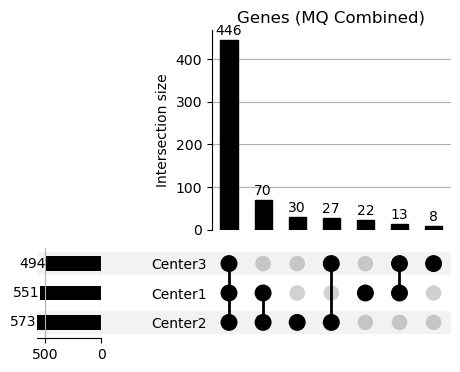

In [16]:
upset_plot.generate_upset_plot(original_gene, 'Gene.names', 'Genes (MQ Combined)', splited=False)

In [17]:
round(446 * 100 / 494, 1)

90.3

# Original vs custom vs merging

## Genes

In [18]:
all_gene_sourses = {}

# do inner join by Gene names for intensities_Gene_from_MQ to one dataframe
intensities_Gene_from_MQ_merged = pd.merge(intensities_Gene_from_MQ['Center1'], intensities_Gene_from_MQ['Center2'], on='Gene.names', how='inner')
intensities_Gene_from_MQ_merged = pd.merge(intensities_Gene_from_MQ_merged, intensities_Gene_from_MQ['Center3'], on='Gene.names', how='inner')
intensities_Gene_from_MQ_merged = intensities_Gene_from_MQ_merged.loc[:,['Gene.names', *metadatas['Center1']['Quantitative.column.name'],
                                                                      *metadatas['Center2']['Quantitative.column.name'], *metadatas['Center3']['Quantitative.column.name']]]
print(intensities_Gene_from_MQ_merged.shape)

all_gene_sourses['Merged'] = intensities_Gene_from_MQ_merged

# do inner join by Gene names for intensities_Gene_from_pep to one dataframe
intensities_Gene_from_pep_merged = pd.merge(intensities_Gene_from_pep['Center1'], intensities_Gene_from_pep['Center2'], on='major_features', how='inner')
intensities_Gene_from_pep_merged = pd.merge(intensities_Gene_from_pep_merged, intensities_Gene_from_pep['Center3'], on='major_features', how='inner')
intensities_Gene_from_pep_merged = intensities_Gene_from_pep_merged.rename(columns={'major_features': 'Gene.names'})
intensities_Gene_from_pep_merged = intensities_Gene_from_pep_merged.loc[:,['Gene.names', *metadatas['Center1']['Quantitative.column.name'],
                                                                      *metadatas['Center2']['Quantitative.column.name'], *metadatas['Center3']['Quantitative.column.name']]]
print(intensities_Gene_from_pep_merged.shape)

all_gene_sourses['Grouped'] = intensities_Gene_from_pep_merged

# do inner join by Gene names for original_gene to one dataframe
original_gene_merged = pd.merge(original_gene['Center1'], original_gene['Center2'], on='Gene.names', how='inner')
original_gene_merged = pd.merge(original_gene_merged, original_gene['Center3'], on='Gene.names', how='inner')
# order column by metadata indexes and then replace them with metadata Quantitative.column.name values
original_gene_merged = original_gene_merged.loc[:,['Gene.names', *metadatas['Center1'].index.tolist(), *metadatas['Center2'].index.tolist(), *metadatas['Center3'].index.tolist()]]
original_gene_merged.columns = ['Gene.names', *metadatas['Center1']['Quantitative.column.name'],
                                                                      *metadatas['Center2']['Quantitative.column.name'], *metadatas['Center3']['Quantitative.column.name']]


print(original_gene_merged.shape)

all_gene_sourses['Original'] = original_gene_merged

(355, 66)
(378, 66)
(446, 66)


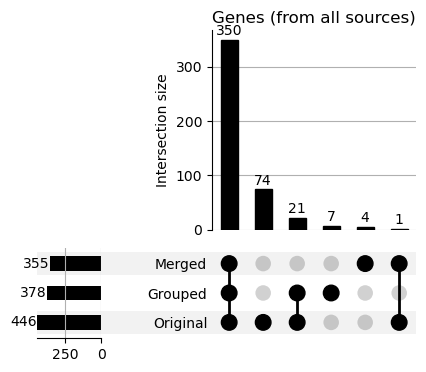

In [19]:
upset_plot.generate_upset_plot(all_gene_sourses, 'Gene.names', 'Genes (from all sources)', splited=False, 
                                categories=['Merged', 'Grouped', 'Original'])

## Protein groups

- intensities_PG_from_MQ
- intensities_PG_from_pep
- original_PG

In [20]:
all_protein_sourses = {}

# do inner join by Gene names for intensities_Gene_from_MQ to one dataframe
intensities_PG_from_MQ_merged = pd.merge(intensities_PG_from_MQ['Center1'], intensities_PG_from_MQ['Center2'], on='Majority.protein.IDs', how='inner')
intensities_PG_from_MQ_merged = pd.merge(intensities_PG_from_MQ_merged, intensities_PG_from_MQ['Center3'], on='Majority.protein.IDs', how='inner')
intensities_PG_from_MQ_merged = intensities_PG_from_MQ_merged.loc[:,['Majority.protein.IDs', *metadatas['Center1']['Quantitative.column.name'],
                                                                      *metadatas['Center2']['Quantitative.column.name'], *metadatas['Center3']['Quantitative.column.name']]]
print(intensities_PG_from_MQ_merged.shape)

all_protein_sourses['Merged'] = intensities_PG_from_MQ_merged

# do inner join by Gene names for intensities_Gene_from_pep to one dataframe
intensities_PG_from_pep_merged = pd.merge(intensities_PG_from_pep['Center1'], intensities_PG_from_pep['Center2'], on='major_features', how='inner')
intensities_PG_from_pep_merged = pd.merge(intensities_PG_from_pep_merged, intensities_PG_from_pep['Center3'], on='major_features', how='inner')
intensities_PG_from_pep_merged = intensities_PG_from_pep_merged.rename(columns={'major_features': 'Majority.protein.IDs'})
intensities_PG_from_pep_merged = intensities_PG_from_pep_merged.loc[:,['Majority.protein.IDs', *metadatas['Center1']['Quantitative.column.name'],
                                                                      *metadatas['Center2']['Quantitative.column.name'], *metadatas['Center3']['Quantitative.column.name']]]
print(intensities_PG_from_pep_merged.shape)

all_protein_sourses['Grouped'] = intensities_PG_from_pep_merged

# do inner join by Gene names for original_gene to one dataframe
original_PG_merged = pd.merge(original_PG['Center1'], original_PG['Center2'], on='Majority.protein.IDs', how='inner')
original_PG_merged = pd.merge(original_PG_merged, original_PG['Center3'], on='Majority.protein.IDs', how='inner')
# order column by metadata indexes and then replace them with metadata Quantitative.column.name values
original_PG_merged = original_PG_merged.loc[:,['Majority.protein.IDs', *metadatas['Center1'].index.tolist(), *metadatas['Center2'].index.tolist(), *metadatas['Center3'].index.tolist()]]
original_PG_merged.columns = ['Majority.protein.IDs', *metadatas['Center1']['Quantitative.column.name'],
                                                                      *metadatas['Center2']['Quantitative.column.name'], *metadatas['Center3']['Quantitative.column.name']]


print(original_PG_merged.shape)

all_protein_sourses['Original'] = original_PG_merged

(355, 66)
(381, 66)
(451, 66)


In [ ]:
# intensities_PG_from_pep_merged.to_csv('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/04_Peptides_PG/merged_intensities.tsv', sep='\t', index=False)


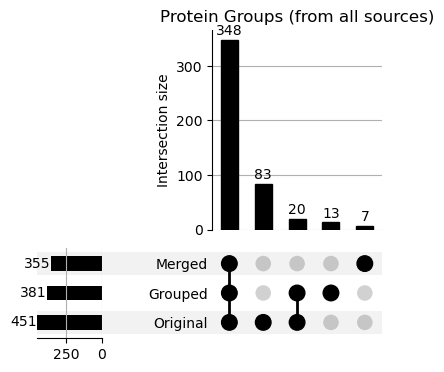

In [21]:
upset_plot.generate_upset_plot(all_protein_sourses, 'Majority.protein.IDs', 'Protein Groups (from all sources)', splited=False,categories=['Merged', 'Grouped', 'Original'])

# Check center2 inside

In [ ]:
def generate_upset_plot(intensities, colname, title, splited=False):
    # Extracting unique features from each center
    features_sets = {}
    for center, details in intensities.items():
        if splited:
            features_sets[center] = set(';'.join(details[colname]).split(';'))
        else:
            features_sets[center] = set(details[colname])
            

        
    # Preparing data for DataFrame construction
    data = {
        'value': [],
        'Original': [],
        'Grouped': []
    }

    # Combining all unique features from the centers
    all_features = set.union(*features_sets.values())

    # Filling the data dictionary
    for item in all_features:
        data['value'].append(item)
        for center in ['Original', 'Grouped']:
            data[center].append(item in features_sets.get(center, []))
    
    # Creating a DataFrame from the data
    df = pd.DataFrame(data)

    # Generating membership list for UpSet plot
    membership_list = df.drop('value', axis=1).astype(bool).apply(lambda row: row.index[row].tolist(), axis=1)
    example = from_memberships(membership_list, data=df['value'])

    # Creating and displaying the UpSet plot
    upset = UpSet(example, subset_size='count', show_counts=True, sort_by='cardinality')
    upset.plot()
    plt.title(title)
    plt.show()

## Gene

In [ ]:
data_grouped = pd.read_csv('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/Check_center_2/intensities_filtered_pep_toGene.names.tsv', sep='\t')
print(f'Number of features in grouped data: {data_grouped.shape[0]}')
# each gene name spltit by ;, sort and join
data_grouped['major_features'] = data_grouped['major_features'].apply(lambda x: ';'.join(sorted(x.split(';'))))
data_grouped = data_grouped.rename(columns={'major_features': 'Gene.names'})
data_grouped = data_grouped.dropna(subset=['Gene.names'])
data_grouped = data_grouped.replace(0, pd.NA)
data_grouped = data_grouped.dropna(thresh=2)
print(f'Number of features in grouped data after filtering: {data_grouped.shape[0]}')

data_original = pd.read_csv('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/Check_center_2/intensities_Gene.tsv', sep='\t')
print(f'Number of features in original MQ output: {data_original.shape[0]}')
data_original['Gene.names'] = data_original['Gene.names'].apply(lambda x: ';'.join(sorted(x.split(';'))))
data_original = data_original.dropna(subset=['Gene.names'])
data_original = data_original.replace(0, pd.NA)
data_original = data_original.dropna(thresh=2)
print(f'Number of features in original MQ output after filtering: {data_original.shape[0]}')

metadata = pd.read_csv('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/Check_center_2/metadata.tsv', sep='\t')

print(f'Number of samples: {metadata.shape[0]}')

intensities = {
    'Original': data_original,
    'Grouped': data_grouped
}

Number of features in grouped data: 501
Number of features in grouped data after filtering: 495
Number of features in original MQ output: 504
Number of features in original MQ output after filtering: 498
Number of samples: 21


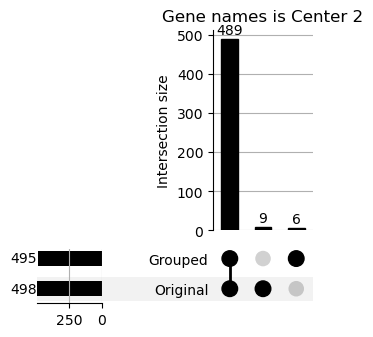

In [ ]:
generate_upset_plot(intensities, 'Gene.names', 'Gene names is Center 2', splited=False)

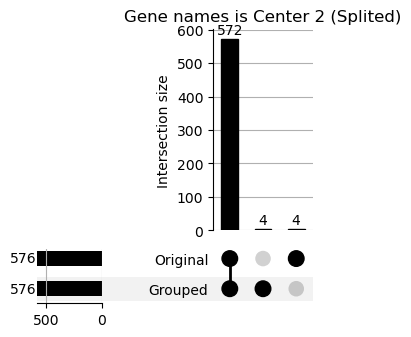

In [ ]:
generate_upset_plot(intensities, 'Gene.names', 'Gene names is Center 2 (Splited)', splited=True)

In [ ]:
# Print Gene.names that are not intersected
original_genes = set(data_original['Gene.names'])
grouped_genes = set(data_grouped['Gene.names'])

print(f'Number of genes in original data: {len(original_genes)}')
print(f'Number of genes in grouped data: {len(grouped_genes)}')
print(f'Number of genes in original data that are not in grouped data: {len(original_genes - grouped_genes)}')
print(f'Number of genes in grouped data that are not in original data: {len(grouped_genes - original_genes)}')




Number of genes in original data: 498
Number of genes in grouped data: 495
Number of genes in original data that are not in grouped data: 9
Number of genes in grouped data that are not in original data: 6


In [ ]:
original_genes - grouped_genes

{'FBLN1',
 'GSN',
 'HLA-A;HLA-H',
 'IGHV3-20;IGHV3-21;IGHV3OR16-10',
 'IGKV2-40;IGKV2D-28',
 'IGKV2D-26;IGKV2D-30',
 'IGLC6',
 'IGLC7',
 'KRT16'}

In [ ]:
grouped_genes - original_genes

{'CFH',
 'CFHR3',
 'IGHV3-20;IGHV3-21;IGHV3-43;IGHV3OR16-10',
 'IGKV2-40;IGKV2D-26;IGKV2D-28;IGKV2D-30',
 'IGLC6;IGLC7',
 'PF4'}

In [ ]:
# keep only shared genes
grouped_genes = set(data_grouped['Gene.names'])
original_genes = set(data_original['Gene.names'])
grouped_genes = grouped_genes.intersection(original_genes)
data_original = data_original[data_original['Gene.names'].isin(grouped_genes)]
data_grouped = data_grouped[data_grouped['Gene.names'].isin(grouped_genes)]
print(f'Number of genes in original data after filtering: {data_original.shape[0]}')

# set index to Gene.names and order by it
data_original = data_original.set_index('Gene.names').sort_index()
data_original = data_original.fillna(0)

data_grouped = data_grouped.set_index('Gene.names').sort_index()
data_grouped = data_grouped.fillna(0)

print(f'Number of genes in grouped data after filtering: {data_grouped.shape[0]}')

# log2 + 1 transformation
# data_original = data_original.applymap(lambda x: round(np.log2(x + 1), 4))
# data_grouped = data_grouped.applymap(lambda x: round(np.log2(x + 1), 4))

data_original = data_original.applymap(lambda x: np.log2(x + 1))
data_grouped = data_grouped.applymap(lambda x: np.log2(x + 1))

Number of genes in original data after filtering: 489
Number of genes in grouped data after filtering: 489


In [ ]:
difference_df = data_original - data_grouped
difference_df.describe()


,P_3.RIC_1,P_3.RIC_2,P_3.RIC_4,P_3.RIC_5,P_3.RIC_6,P_3.RIC_7,P_3.RIC_8,P_3.RIC_9,P_3.RIC_10,P_3.RIC_11,...,P_5.RIC_2,P_5.RIC_3,P_5.RIC_4,P_5.RIC_5,P_5.RIC_6,P_5.RIC_7,P_5.RIC_8,P_5.RIC_9,P_5.RIC_10,P_5.RIC_11
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,-0.013365,-0.012492,-0.013705,-0.008941,-0.014374,-0.010063,-0.012113,-0.010439,-0.011357,-0.009199,...,-0.074347,-0.072164,-0.073793,-0.075851,-0.077782,-0.076199,-0.073358,-0.077946,-0.072486,-0.074403
std,0.393024,0.352272,0.355350,0.360417,0.365119,0.342496,0.347059,0.362501,0.335660,0.337409,...,1.058463,1.043753,1.059102,1.060460,1.060530,1.095358,1.070759,1.089340,1.055063,1.061383
min,-5.357738,-4.030090,-4.070763,-4.011814,-4.461101,-4.004690,-4.355306,-3.903968,-4.012943,-3.622224,...,-16.576617,-16.825530,-17.239524,-16.924859,-16.423789,-18.100975,-17.491657,-18.083952,-17.218885,-17.251704
25%,-0.000010,-0.000009,-0.000008,-0.000007,-0.000010,-0.000009,-0.000008,-0.000007,-0.000012,-0.000008,...,-0.000009,-0.000009,-0.000007,-0.000009,-0.000010,-0.000011,-0.000011,-0.000010,-0.000010,-0.000012
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000008,0.000007,0.000008,0.000008,0.000008,0.000009,0.000008,0.000007,0.000008,0.000008,...,0.000010,0.000008,0.000012,0.000012,0.000010,0.000008,0.000009,0.000011,0.000012,0.000008
max,4.224041,4.116338,3.946859,4.237724,4.197450,3.873805,3.904230,4.792269,4.002814,4.117435,...,1.391967,1.313850,1.361722,1.270166,1.593122,1.289268,1.454330,1.052251,1.541093,1.179777


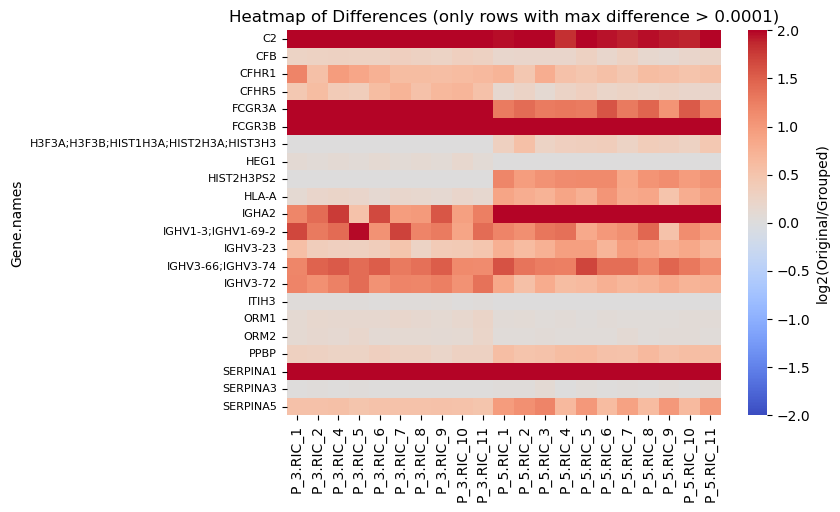

In [ ]:
# plot the same but only for the rows with the biggest differences
difference_df_abs = difference_df.abs()
plt.figure(figsize=(7, 5))
plt.yticks(fontsize=8)
sns.heatmap(difference_df_abs[difference_df_abs.max(axis=1) > 0.0001], annot=False, cmap='coolwarm', center=0, vmin = -2, vmax = 2, cbar_kws={'label': 'log2(Original/Grouped)'})
plt.title('Heatmap of Differences (only rows with max difference > 0.0001)')
plt.show()


In [730]:
# how many rows with max difference == 0
difference_df_abs[difference_df.max(axis=1) <= 0.0001].shape[0]


478

## Protein groups (Major)

In [733]:
data_grouped = pd.read_csv('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/Check_center_2/intensities_filtered_pep_toProteins.tsv', sep='\t')
print(f'Number of features in grouped data: {data_grouped.shape[0]}')
# each gene name spltit by ;, sort and join
data_grouped['major_features'] = data_grouped['major_features'].apply(lambda x: ';'.join(sorted(x.split(';'))))
data_grouped = data_grouped.rename(columns={'major_features': 'Gene.names'})
data_grouped = data_grouped.dropna(subset=['Gene.names'])
data_grouped = data_grouped.replace(0, pd.NA)
data_grouped = data_grouped.dropna(thresh=2)
print(f'Number of features in grouped data after filtering: {data_grouped.shape[0]}')

data_original = pd.read_csv('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/Check_center_2/intensities_PG.tsv', sep='\t')
print(f'Number of features in original MQ output: {data_original.shape[0]}')
data_original = data_original.rename(columns={'Majority.protein.IDs': 'Gene.names'})
data_original['Gene.names'] = data_original['Gene.names'].apply(lambda x: ';'.join(sorted(x.split(';'))))
data_original = data_original.dropna(subset=['Gene.names'])
data_original = data_original.replace(0, pd.NA)
data_original = data_original.dropna(thresh=2)
print(f'Number of features in original MQ output after filtering: {data_original.shape[0]}')

metadata = pd.read_csv('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/balanced_data/Check_center_2/metadata.tsv', sep='\t')

print(f'Number of samples: {metadata.shape[0]}')

intensities = {
    'Original': data_original,
    'Grouped': data_grouped
}

Number of features in grouped data: 529
Number of features in grouped data after filtering: 519
Number of features in original MQ output: 530
Number of features in original MQ output after filtering: 520
Number of samples: 21


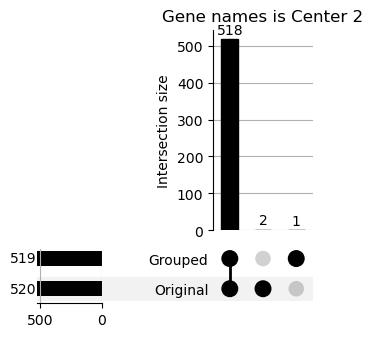

In [734]:
generate_upset_plot(intensities, 'Gene.names', 'Gene names is Center 2', splited=False)

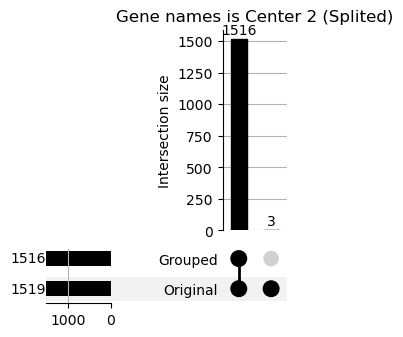

In [735]:
generate_upset_plot(intensities, 'Gene.names', 'Gene names is Center 2 (Splited)', splited=True)

In [736]:
# Print Gene.names that are not intersected
original_genes = set(data_original['Gene.names'])
grouped_genes = set(data_grouped['Gene.names'])

print(f'Number of genes in original data: {len(original_genes)}')
print(f'Number of genes in grouped data: {len(grouped_genes)}')
print(f'Number of genes in original data that are not in grouped data: {len(original_genes - grouped_genes)}')
print(f'Number of genes in grouped data that are not in original data: {len(grouped_genes - original_genes)}')




Number of genes in original data: 520
Number of genes in grouped data: 519
Number of genes in original data that are not in grouped data: 2
Number of genes in grouped data that are not in original data: 1


In [737]:
grouped_genes - original_genes

{'A0A8V8TND7'}

In [738]:
original_genes - grouped_genes

{'A0A0A0MS51;A0A0A0MT01;A0A8V8TND7', 'P06396'}

In [747]:
# keep only shared genes
grouped_genes = set(data_grouped['Gene.names'])
original_genes = set(data_original['Gene.names'])
grouped_genes = grouped_genes.intersection(original_genes)
data_original = data_original[data_original['Gene.names'].isin(grouped_genes)]
data_grouped = data_grouped[data_grouped['Gene.names'].isin(grouped_genes)]
print(f'Number of genes in original data after filtering: {data_original.shape[0]}')

# set index to Gene.names and order by it
data_original = data_original.set_index('Gene.names').sort_index()
data_original = data_original.fillna(0)

data_grouped = data_grouped.set_index('Gene.names').sort_index()
data_grouped = data_grouped.fillna(0)

print(f'Number of genes in grouped data after filtering: {data_grouped.shape[0]}')

# log2 + 1 transformation
# data_original = data_original.applymap(lambda x: round(np.log2(x + 1), 4))
# data_grouped = data_grouped.applymap(lambda x: round(np.log2(x + 1), 4))

data_original = data_original.applymap(lambda x: np.log2(x + 1))
data_grouped = data_grouped.applymap(lambda x: np.log2(x + 1))

Number of genes in original data after filtering: 518
Number of genes in grouped data after filtering: 518


In [748]:
difference_df = data_original - data_grouped
difference_df.describe()


,P_3.RIC_1,P_3.RIC_2,P_3.RIC_4,P_3.RIC_5,P_3.RIC_6,P_3.RIC_7,P_3.RIC_8,P_3.RIC_9,P_3.RIC_10,P_3.RIC_11,...,P_5.RIC_2,P_5.RIC_3,P_5.RIC_4,P_5.RIC_5,P_5.RIC_6,P_5.RIC_7,P_5.RIC_8,P_5.RIC_9,P_5.RIC_10,P_5.RIC_11
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,...,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,-0.008207,-0.000844,-0.001565,-0.000986,-0.004152,0.000900,-0.005542,-0.003151,-0.001464,-0.004267,...,-0.005798,-0.000640,-0.003415,-0.005752,-0.007625,-0.006270,0.001655,-0.004050,0.001227,-0.002055
std,0.511730,0.556608,0.531852,0.523230,0.511920,0.541226,0.509099,0.520774,0.528359,0.490858,...,0.440014,0.480886,0.432782,0.457652,0.489887,0.441173,0.495352,0.450449,0.483615,0.447343
min,-6.356992,-6.252479,-6.287882,-6.088870,-6.079569,-6.037269,-6.340574,-6.340556,-6.063655,-6.198037,...,-5.566936,-5.309140,-4.954004,-5.502535,-5.712231,-5.301243,-5.332206,-5.390743,-5.335713,-5.168128
25%,-0.000009,-0.000007,-0.000007,-0.000007,-0.000009,-0.000007,-0.000006,-0.000006,-0.000010,-0.000006,...,-0.000008,-0.000008,-0.000006,-0.000008,-0.000008,-0.000009,-0.000009,-0.000008,-0.000008,-0.000009
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000007,0.000006,0.000008,0.000007,0.000007,0.000008,0.000007,0.000007,0.000007,0.000008,...,0.000008,0.000007,0.000012,0.000011,0.000009,0.000008,0.000008,0.000010,0.000011,0.000007
max,5.019005,7.272225,7.025110,6.362589,6.402187,7.205723,5.143520,7.089796,7.184422,4.897085,...,3.954986,4.384293,4.307333,4.490020,4.538648,4.135481,5.448218,4.121272,4.886859,4.354557


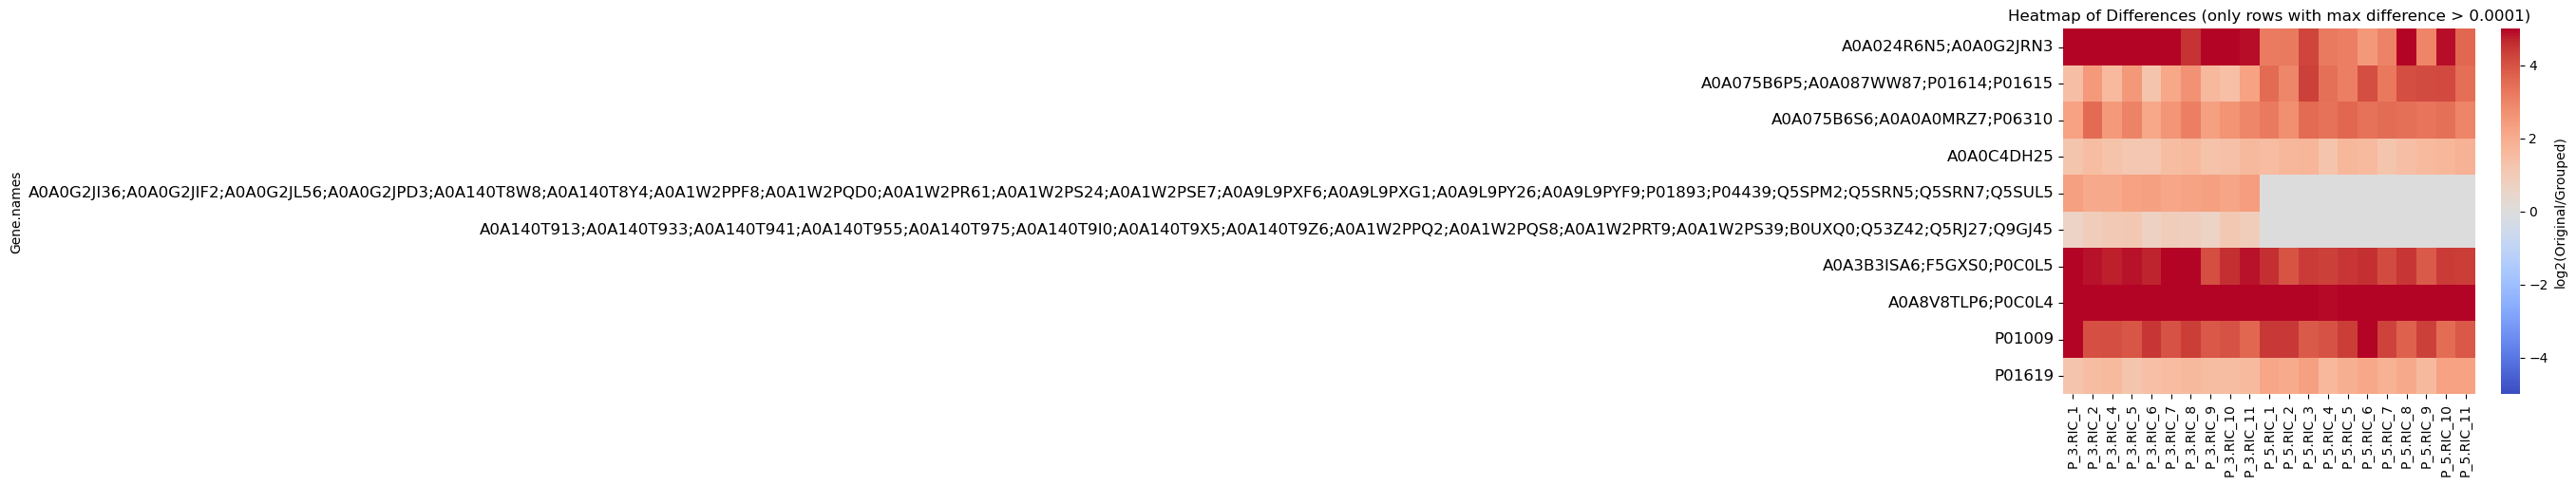

In [758]:
# plot the same but only for the rows with the biggest differences
difference_df_abs = difference_df.abs()
plt.figure(figsize=(7, 5))
plt.yticks(fontsize=12)
sns.heatmap(difference_df_abs[difference_df_abs.max(axis=1) >= 0.0001], 
            annot=False, cmap='coolwarm', center=0, 
            vmin = -5, vmax = 5, 
            cbar_kws={'label': 'log2(Original/Grouped)'})
plt.title('Heatmap of Differences (only rows with max difference > 0.0001)')
plt.show()


In [759]:
# how many rows with max difference == 0
difference_df_abs[difference_df.max(axis=1) <= 0.0001].shape[0]


513

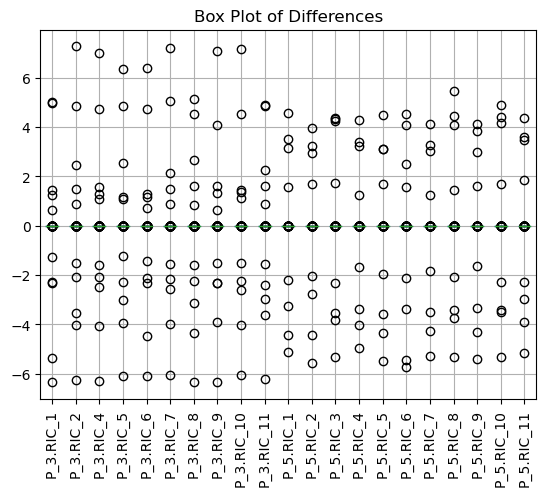

In [760]:
difference_df.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Differences')
plt.show()


In [761]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(data_original, data_grouped)
rmse = np.sqrt(mse)

print(f"MSE: {mse}, RMSE: {rmse}")


MSE: 0.2414130012584688, RMSE: 0.49133797050347006
